In [1]:
#RUN THIS BEFORE USING
%reset
%matplotlib inline
import network_modules as nm
import graph_measures as gm
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import networkx as nx
import collections
import scipy.signal as sig

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
slider1 = widgets.IntSlider(min=50, max=5000, step=50, value= 50, description = 'n')
slider2 = widgets.IntSlider(min=1, max=10, value=1, description = 'm')
slider3 = widgets.FloatSlider(min=0, max=10, value=1, description = 'a')
slider4 = widgets.FloatSlider(min=0, max=2*np.pi, value=0, description = 'b')
slider5 = widgets.FloatSlider(min=0, max=1, value=0, description = 'c')
slider6 = widgets.FloatSlider(min=0, max=10, value=1, description = 'K')
display(slider1, slider2, slider3, slider4, slider5,slider6)

In [3]:
n = slider1.value
m = slider2.value
print('n = ',n)
print('m = ',m)
G = nx.barabasi_albert_graph(n, m)

n =  50
m =  1


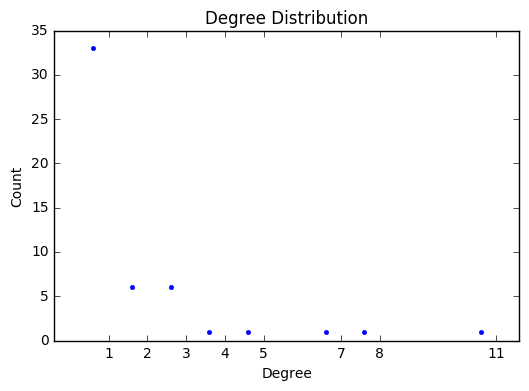

In [4]:
gm.degree_distribution(G)

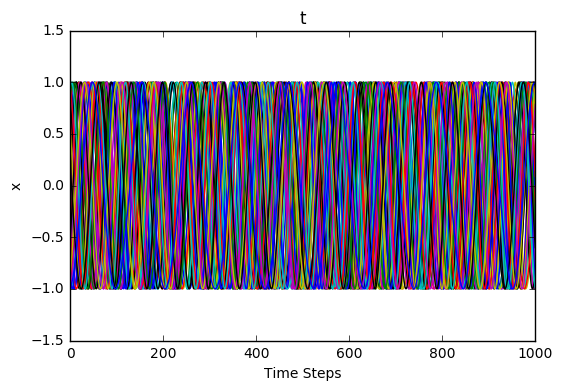

In [5]:
#Parameter Initialization

distributions = [(n,0,2*np.pi,'uniform'),(n,10,2,'normal')]
states = nm.create_vec_states(distributions)
z = np.cos(states[:,0]) + 1j * np.sin(states[:,0])
w = 1j * states[:,1]
x = [[a,b] for a,b in zip(z,w)]

def currynode(w):
    def node(x):   #node function
        return np.array([1j * x[0] * w + x[0]*(1-abs(x[0])),0*1j]) # apply limit cycle term to keep in a circle
    return node

h = [currynode(w) for w in states[:,1]]

def f(x,y): #coupling function
    a = slider3.value
    b = slider4.value
    c = slider5.value
    K = slider6.value
    phi = np.angle(y[0])-np.angle(x[0])
    return np.array([1j * x[0] * complex(K*(np.sin(a*phi+b)+c),0),0*1j])

M = np.identity(n) #Measurement Matrix
N = 0 #Noise Variance

oscillator = nm.nmodel(G,x,h,f,M,N,dt=.01)
oscillator.run(10)
nm.state_course(np.real(nm.reduce_state(0,oscillator.x)))

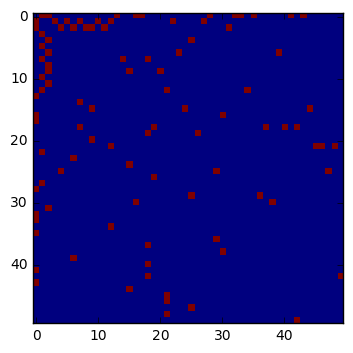

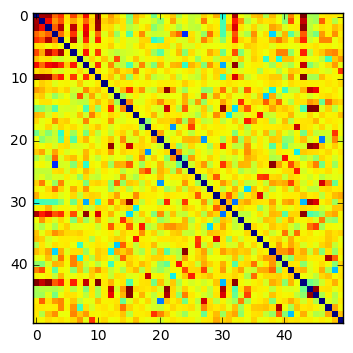

In [6]:
nm.plt_graph(oscillator.G)
plt.figure()
x = gm.cross_func(nm.reduce_state(0,oscillator.x),gm.phase_synchrony)
plt.imshow(x, interpolation= "nearest")


C:\Users\Rohit\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


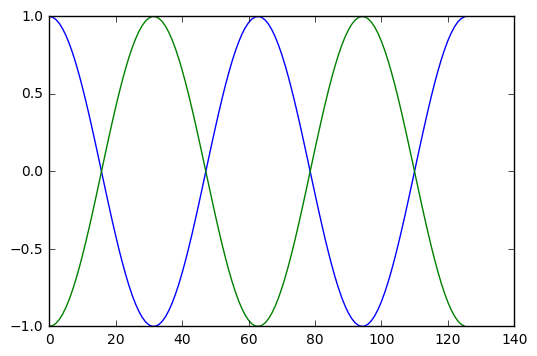

(-1-1.22779872689e-16j)


In [7]:
def frange(start, stop, step):  
    i = start
    while i < stop:
        yield i
        i += step
        
@interact(off = (0.0,2*np.pi))
def f(off):
    x = np.matrix([np.cos(x) + 1j*np.sin(x) for x in frange(0,4*np.pi,.1)])
    y = np.matrix([np.cos(x + off) + 1j*np.sin(x + off) for x in frange(0,4*np.pi,.1)])
    plt.figure()
    plt.plot(np.array(x)[0])
    plt.plot(np.array(y)[0])
    plt.show()
    print(gm.correlation(x,y))
    

In [8]:
#f, t, s = sig.spectrogram(signal, fs = 1000, window, nperseg, noverlap, nfft)
#f, Pxx = sig.welch(signal, fs = 1000, window, nperseg, noverlap, nfft)
#import pywt
#cA, cD = pywt.dwt([1, 2, 3, 4], 'db1') - Direct Wavelet Transform

In [364]:
def jaccard(A, B):
    andsum = sum([sum([i and j for i,j in zip(a,b)]) for a,b in zip(A,B)])
    orsum = sum([sum([i or j for i,j in zip(a,b)]) for a,b in zip(A,B)])
    if orsum == 0:
        return 1.0
    else: 
        return andsum/orsum

#graph similarity index
def cosine(A,B):
    import itertools
    mag = lambda x: np.sqrt(np.dot(x,x))
    test_z = lambda arr: all(x == 0 for x in itertools.chain(*arr))
    if test_z(A) or test_z(B):
        if test_z(A) and test_z(B):
            return 1.0
        else:
            return 0.0
    else:
        return 1 - (sum(np.nan_to_num([1 - (np.dot(a,b)/(mag(a)*mag(b))) for a,b in zip(A,B)]))/len(A))

#graph similarity index
def distance(A,B):
    dis = sum([sum(x) for x in abs(A-B)])
    n = len(A)
    return max((n**2 - dis - n)/n**2 * n/(n-1) , 0)


n = 200
A = np.zeros((n,n))
B = np.zeros((n,n))+1
np.fill_diagonal(B,0)
print(A,'\n',B)
print(cosine(A,A),distance(A,A),jaccard(A,A))

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]] 
 [[ 0.  1.  1. ...,  1.  1.  1.]
 [ 1.  0.  1. ...,  1.  1.  1.]
 [ 1.  1.  0. ...,  1.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  0.  1.  1.]
 [ 1.  1.  1. ...,  1.  0.  1.]
 [ 1.  1.  1. ...,  1.  1.  0.]]
1.0 1.0 1.0
